In [6]:
from auction import adExchange
from decisiontree import decisionTree, buildDecisionTree
from scipy.stats import wasserstein_distance
from utils import turnbull
import collections
import bisect
import matplotlib.pyplot as plt
%matplotlib inline

# PCTR Explore
## Second Price

In [ ]:
adex = adExchange(auction_type = "second")

In [ ]:
adex.clearRecord()
adex.generateMultipleBidRecord(10000)

In [ ]:
competitor = 8
data = adex.getCensoredRecord(competitor)
full = adex.getFullInfoOfCompetitor(competitor)
t = [k[1] for k in data]
sum(k[0] for k in data)

In [36]:
full

[[0,
  -1,
  101.54090248562143,
  [2,
   5,
   9,
   3.8620324118858815,
   6.598897625517211,
   4.863690474065877,
   6.0195563409060355,
   1.6381209866397448,
   6.033333436784396,
   3.066987051627001],
  28.483058309440292,
  3.5649578560869353],
 [0,
  -1,
  8.913667392554844,
  [2,
   4,
   6,
   3.687452927303495,
   4.8431457916303025,
   0.669306433140564,
   2.924020784161043,
   4.9687521035499165,
   3.3877398367348732,
   3.0116611613025044],
  22.329858467742405,
  0.3991815445418734],
 [0,
  -1,
  46.65249667707733,
  [2,
   1,
   1,
   2.240809722254342,
   0.3929361051503921,
   3.202480988846806,
   5.494125786775973,
   0.6708368316604182,
   1.0981549104530723,
   1.5491344187608025],
  11.931738174571938,
  3.9099497486878967],
 [0,
  -1,
  77.71147406913762,
  [2,
   5,
   8,
   0.8530056617670716,
   6.577795023503218,
   0.5730310052454457,
   0.1971539763064397,
   6.169010146827434,
   0.9717662414923023,
   0.6755742295337316],
  20.031251352518197,
  3.87

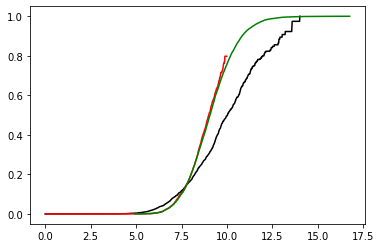

In [35]:
#######################################################
################# SecondPrice Auction #################
#######################################################

#######################################################
################## KME For Final Bid ##################
#######################################################
censored_data = [[k[1], k[0]] if k[0] else [k[2], k[0]] for k in full]
num_this_price_bins = 1000
min_price = min([k[0] for k in censored_data])
max_price = max([k[0] for k in censored_data])
bin_width = (max_price - min_price) / num_this_price_bins
this_price_bins = [min_price + bin_width]
for _ in range(1, num_this_price_bins - 1):
    this_price_bins.append(this_price_bins[-1] + bin_width)
    
def kme(data, gap = -1):
    count = [[0, 0] for _ in range(num_this_price_bins)]
    for p, k in data:
        pos = bisect.bisect_left(this_price_bins, p)
        count[pos][0] += k
        count[pos][1] += 1 - k
    loseprob = [1]
    ni = len(data)
    for i in range(len(count)):
        di = count[i][0]
        if gap != -1:
            if i >= gap:
                di += count[i - gap][1] * 0.5
                ni += count[i - gap][1]
        if i > 1:
            ni -= count[i - 2][1]
        if i:
            ni -= count[i - 1][0]
        if ni != 0:
            loseprob.append(loseprob[-1] * (1 - di / ni))
        else:
            loseprob.append(loseprob[-1])
        if gap != -1:
            if i >= gap:
                ni -= count[i - gap][1]
    winprob = [1 - k for k in loseprob]
    return winprob[1:]

average_pctr = sum(k[-2] for k in full) / len(full)
x = [2 * this_price_bins[0] - this_price_bins[1]] + this_price_bins
x = [k / average_pctr for k in x]
plt.plot(x, kme(censored_data), 'black')

#######################################################
################# KME For Running Bid #################
#######################################################
censored_data = [[k[1] * k[-1] / k[2], k[0]] if k[0] else [k[-1], k[0]] for k in full]
num_this_price_bins = 1000
min_price = min([k[0] for k in censored_data])
max_price = max([k[0] for k in censored_data])
bin_width = (max_price - min_price) / num_this_price_bins
this_price_bins = [min_price + bin_width]
for _ in range(1, num_this_price_bins - 1):
    this_price_bins.append(this_price_bins[-1] + bin_width)
x = [2 * this_price_bins[0] - this_price_bins[1]] + this_price_bins
plt.plot(x, kme(censored_data), 'red')

#######################################################
##################### GroundTruth #####################
#######################################################
winningprice = []
for i in range(len(adex.bid_record)):
    if full[i][0]:
        winningprice.append(sorted(adex.bid_record[i][3])[-2][0])
    else:
        winningprice.append(sorted(adex.bid_record[i][3])[-1][0])
# winningprice = [k[0] for k in adex.bid_record]
gt = [winningprice[i] * full[i][-1] / full[i][2] for i in range(len(full))]
sorted_gt = sorted(gt)
plt.plot(sorted_gt, [k / len(sorted_gt) for k in range(len(sorted_gt))], 'green')

## First Price

In [37]:
adex = adExchange(auction_type = "first")

In [38]:
adex.clearRecord()
adex.generateMultipleBidRecord(10000)

[[145.3805858327806,
  14,
  [2,
   5,
   2,
   3.290759226363486,
   1.9388666835425454,
   1.1432751647910933,
   0.46684120618862257,
   3.3816835473534033,
   5.31249880069581,
   6.248472071151764],
  [(46.494588203369695, 0),
   (75.50529981153029, 1),
   (61.42153807327974, 2),
   (2.457556590595365, 3),
   (95.91243587957167, 4),
   (92.0593269750835, 5),
   (89.63239265749075, 6),
   (4.383766293163763, 7),
   (99.7140509102239, 8),
   (95.09793484269352, 9),
   (98.88978114456097, 10),
   (70.98997691743024, 11),
   (103.28158844260257, 12),
   (1.8222232946403067, 13),
   (145.3805858327806, 14),
   (65.83515358645191, 15),
   (100.08929019863224, 16),
   (37.730226101173145, 17),
   (40.41156575967439, 18),
   (16.69883614388054, 19)]],
 [106.61364459272443,
  2,
  [1,
   4,
   3,
   0.05356553484951565,
   2.488191009728979,
   5.650568957364663,
   2.229648746035677,
   5.172655231777808,
   3.3961032831323377,
   0.6112779741629686],
  [(85.25981445337948, 0),
   (55.216

In [41]:
competitor = 5
data = adex.getCensoredRecord(competitor)
full = adex.getFullInfoOfCompetitor(competitor)
t = [k[1] for k in data]
sum(k[0] for k in data)

1969

In [42]:
full

[[0,
  -1,
  92.0593269750835,
  [2,
   5,
   2,
   3.290759226363486,
   1.9388666835425454,
   1.1432751647910933,
   0.46684120618862257,
   3.3816835473534033,
   5.31249880069581,
   6.248472071151764],
  19.057610846380562,
  4.830580691208073],
 [0,
  -1,
  76.33960261572177,
  [1,
   4,
   3,
   0.05356553484951565,
   2.488191009728979,
   5.650568957364663,
   2.229648746035677,
   5.172655231777808,
   3.3961032831323377,
   0.6112779741629686],
  19.375263251313715,
  3.940054987926198],
 [1,
  233.8720177582341,
  233.8720177582341,
  [1,
   5,
   3,
   6.582822113103845,
   1.1007164076273128,
   1.9321041980392188,
   4.066591409453933,
   5.8861548445590675,
   6.256372391533136,
   1.350624678256923],
  24.643139957104676,
  9.49034977544768],
 [0,
  -1,
  109.99410577421605,
  [1,
   4,
   8,
   2.497349493007079,
   4.3522138832921575,
   4.957057327843882,
   5.499053666668804,
   5.655670519220272,
   3.3807634200417898,
   3.462637016057988],
  29.245333573605357,

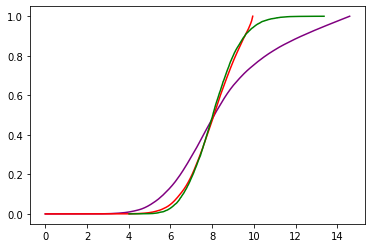

In [44]:
#######################################################
################# First Price Auction #################
#######################################################

#######################################################
############### Turnbull For Final Bid ################
#######################################################
censored_data = [[k[1], k[0]] if k[0] else [k[2], k[0]] for k in full]
    
xx, dist = turnbull(censored_data)
average_pctr = sum(k[-2] for k in full) / len(full)
xx = [k / average_pctr for k in xx]
plt.plot(xx, dist, 'purple')

#######################################################
############### Turnbull For Running Bid ##############
#######################################################
censored_data = [[k[1] * k[-1] / k[2], k[0]] if k[0] else [k[-1], k[0]] for k in full]
xx, dist = turnbull(censored_data)
plt.plot(xx, dist, 'red')

#######################################################
##################### GroundTruth #####################
#######################################################
winningprice = []
for i in range(len(adex.bid_record)):
    if full[i][0]:
        winningprice.append(sorted(adex.bid_record[i][3])[-2][0])
    else:
        winningprice.append(sorted(adex.bid_record[i][3])[-1][0])
# winningprice = [k[0] for k in adex.bid_record]
gt = [winningprice[i] * full[i][-1] / full[i][2] for i in range(len(full))]
sorted_gt = sorted(gt)
plt.plot(sorted_gt, [k / len(sorted_gt) for k in range(len(sorted_gt))], 'green')

# Discrete Running Bid Explore

In [7]:
import random

class competitor:

    def __init__(self, competitor_id, num_attributes, is_myself = False, budget = float('inf')):
        self.competitor_id = competitor_id
        self.num_attributes = num_attributes
        self.remaining_budget = budget
        self.attribute_weights = [random.random() for _ in range(num_attributes)]
        self.bidprice_record = []
        self.is_myself = is_myself

    def bidprice(self, attributes):
        running_bid = self.generateRunningBid() if not self.is_myself else self.generateRunningBidSelf()
        pctr = self.generatePctr(attributes)
        price = running_bid * pctr

        # price = max(sum([self.attribute_weights[i] * attributes[i] for i in range(self.num_attributes)]) + self.generateNoise() * self.num_attributes, 0)
        if price > self.remaining_budget:
            price = self.remaining_budget
            self.remaining_budget = 0
        else:
            self.remaining_budget -= price
        self.bidprice_record.append((price, pctr, running_bid))
        return price

    def clearBidPriceRecord(self):
        self.bidprice_record = []

    # TODO: Add other noise type
    def generateNoise(self):
        return random.random()

    def generatePctr(self, attributes):
        return sum([self.attribute_weights[i] * attributes[i] for i in range(self.num_attributes)])
    
    def generateRunningBid(self, range = 10):
        return random.random() * range
    
    def generateRunningBidSelf(self):
#         return random.choice([8, 7] * 50 + [1, 2, 10, 20, 40])
#         return random.expovariate(0.127)
        return random.lognormvariate(2, 0.3)


class adExchange:

    # TODO: Add time attribute
    # num_competitors >= 2
    def __init__(self, num_competitors = 20, num_integer_attributes = 3, integer_attributes_range = [2, 5, 10], num_float_attributes = 7, float_attributes_range = [], auction_type = 'first', myself_idx = -1):
        if len(integer_attributes_range) == 0:
            integer_attributes_range = [4 for _ in range(num_integer_attributes)]
        elif len(integer_attributes_range) != num_integer_attributes:
            print("Length of integer_attributes_range must match num_integer_attributes!")
            return
        if len(float_attributes_range) == 0:
            average_integer_attribute_range = sum(integer_attributes_range) / num_integer_attributes
            float_attributes_range = [average_integer_attribute_range + 1 for _ in range(num_float_attributes)]
        elif len(float_attributes_range) != num_float_attributes:
            print("Length of float_attributes_range must match num_float_attributes or be equal to 0!")
            return
        
        self.num_competitors = num_competitors
        self.num_integer_attributes = num_integer_attributes
        self.integer_attributes_range = integer_attributes_range
        self.num_float_attributes = num_float_attributes
        self.float_attributes_range = float_attributes_range
        self.num_attributes = num_integer_attributes + num_float_attributes
        self.auction_type = auction_type
        self.competitors = [competitor(i, self.num_attributes) if i != myself_idx else competitor(i, self.num_attributes, is_myself = True) for i in range(self.num_competitors)]
        self.bid_record = []


    def generateOneBid(self):
        '''
        Return type: list
            winning_price: float
            winning_id: int
            attributes: list
            competitor_bidprices: list
        '''
        # Generate attributes
        attributes = []
        for i in range(self.num_attributes):
            if i < self.num_integer_attributes:
                attributes.append(self.generateRandomAttribute(i, "integer"))
            else:
                attributes.append(self.generateRandomAttribute(i - self.num_integer_attributes, "float"))

        # Generate bid price for each competitor
        # TODO: Floor price
        competitor_bidprices = [(k.bidprice(attributes), i) for i, k in enumerate(self.competitors)]
        sorted_bidprice = sorted(competitor_bidprices, reverse = True)
        if self.auction_type == 'first':
            winning_price, winning_id = sorted_bidprice[0]
        elif self.auction_type == 'second':
            winning_price = sorted_bidprice[1][0]
            winning_id = sorted_bidprice[0][1]

        return [winning_price, winning_id, attributes, competitor_bidprices]


    def generateMultipleBidRecord(self, num_records, save = False, save_path = "./bid_record"):
        '''
        Return type: list of list
            winning_price: float
            winning_id: int
            attributes: list
            competitor_bidprices: list
        '''
        for _ in range(num_records):
            self.bid_record.append(self.generateOneBid())

        if save:
            self.saveRecord(self.bid_record, save_path + ".txt")
        return self.bid_record


    def getCensoredRecord(self, competitor_idx, save = False, save_path = "./censored_record_competitor_"):
        '''
        Return type: list of list
            win or lose: 1 is win, 0 is lose
            winning_price: -1 if lose
            bidprice: float
            attributes: list
        '''
        if competitor_idx >= self.num_competitors:
            print("Wrong competitor_idx!")
            return
        censored_record = []
        for winning_price, winning_id, attributes, competitor_bidprices in self.bid_record:
            if competitor_idx == winning_id:
                censored_record.append([1, winning_price, competitor_bidprices[competitor_idx][0], attributes])
            else:
                censored_record.append([0, -1, competitor_bidprices[competitor_idx][0], attributes])
        
        # TODO: Save censored_record
        if save:
            self.saveRecord(censored_record, save_path + str(competitor_idx) + ".txt")
        return censored_record

    
    def getFullInfoOfCompetitor(self, competitor_idx):
        '''
        Return type: list of list
            win or lose: 1 is win, 0 is lose
            winning_price: -1 if lose
            bidprice: float
            attributes: list
            pctr: float
            running_bid: float
        '''
        if competitor_idx >= self.num_competitors:
            print("Wrong competitor_idx!")
            return
        full_info = []
        for i in range(len(self.bid_record)):
            winning_price, winning_id, attributes, competitor_bidprices = self.bid_record[i]
            price, pctr, running_bid = self.competitors[competitor_idx].bidprice_record[i]
            if competitor_bidprices[competitor_idx][0] != price:
                print("Error!")
            if competitor_idx == winning_id:
                full_info.append([1, winning_price, competitor_bidprices[competitor_idx][0], attributes, pctr, running_bid])
            else:
                full_info.append([0, -1, competitor_bidprices[competitor_idx][0], attributes, pctr, running_bid])
        return full_info


    def clearRecord(self):
        self.bid_record = []
        for k in self.competitors:
            k.clearBidPriceRecord()


    def getRecordLength(self):
        return len(self.bid_record)


    # TODO: Save records
    def saveRecord(self, record, path):
        pass


    def generateRandomAttribute(self, attribute_idx, attribute_type):
        if attribute_type == "integer":
            return random.randint(1, self.integer_attributes_range[attribute_idx])
        elif attribute_type == "float":
            return random.random() * self.float_attributes_range[attribute_idx]

## Second Price

In [8]:
adex = adExchange(auction_type = "second", myself_idx = 0)

In [9]:
adex.clearRecord()
adex.generateMultipleBidRecord(10000)

[[165.15843944963476,
  10,
  [2,
   1,
   7,
   5.100065019441269,
   2.5150380971915762,
   0.061934447338969356,
   2.1157039188494173,
   4.795281175388102,
   2.19834684950736,
   5.19092905285811],
  [(79.12179335669869, 0),
   (56.93563765255112, 1),
   (94.16437718503433, 2),
   (42.418399832509884, 3),
   (108.90541605873175, 4),
   (165.15843944963476, 5),
   (3.534830004071034, 6),
   (131.1156585426195, 7),
   (153.31469289430936, 8),
   (98.12300600930946, 9),
   (167.49379713536297, 10),
   (152.02597574030898, 11),
   (140.5645631882651, 12),
   (92.65727730113876, 13),
   (163.838019446789, 14),
   (20.578803753317143, 15),
   (19.537097880177075, 16),
   (46.851723258894225, 17),
   (42.619041252725445, 18),
   (103.88682110075662, 19)]],
 [208.10542456413447,
  0,
  [2,
   2,
   4,
   2.690960369086577,
   3.4672257375532696,
   4.885663829853053,
   5.770152573094561,
   4.071298338708296,
   0.21011505187521856,
   5.449478299572839],
  [(233.72519719940806, 0),
   

In [10]:
c = 0
data = adex.getCensoredRecord(c)
full = adex.getFullInfoOfCompetitor(c)
t = [k[1] for k in data]
sum(k[0] for k in data)

3027

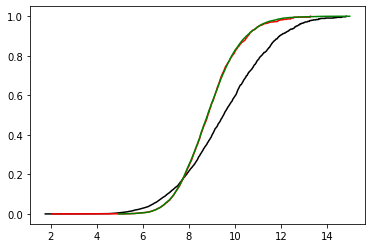

In [11]:
#######################################################
################# SecondPrice Auction #################
#######################################################

#######################################################
################## KME For Final Bid ##################
#######################################################
censored_data = [[k[1], k[0]] if k[0] else [k[2], k[0]] for k in full]
num_this_price_bins = 1000
min_price = min([k[0] for k in censored_data])
max_price = max([k[0] for k in censored_data])
bin_width = (max_price - min_price) / num_this_price_bins
this_price_bins = [min_price + bin_width]
for _ in range(1, num_this_price_bins - 1):
    this_price_bins.append(this_price_bins[-1] + bin_width)
    
def kme(data, gap = -1):
    count = [[0, 0] for _ in range(num_this_price_bins)]
    for p, k in data:
        pos = bisect.bisect_left(this_price_bins, p)
        count[pos][0] += k
        count[pos][1] += 1 - k
    loseprob = [1]
    ni = len(data)
    for i in range(len(count)):
        di = count[i][0]
        if gap != -1:
            if i >= gap:
                di += count[i - gap][1] * 0.5
                ni += count[i - gap][1]
        if i > 1:
            ni -= count[i - 2][1]
        if i:
            ni -= count[i - 1][0]
        if ni != 0:
            loseprob.append(loseprob[-1] * (1 - di / ni))
        else:
            loseprob.append(loseprob[-1])
        if gap != -1:
            if i >= gap:
                ni -= count[i - gap][1]
    winprob = [1 - k for k in loseprob]
    return winprob[1:]

average_pctr = sum(k[-2] for k in full) / len(full)
x = [2 * this_price_bins[0] - this_price_bins[1]] + this_price_bins
x = [k / average_pctr for k in x]
plt.plot(x, kme(censored_data), 'black')

#######################################################
################# KME For Running Bid #################
#######################################################
censored_data = [[k[1] * k[-1] / k[2], k[0]] if k[0] else [k[-1], k[0]] for k in full]
num_this_price_bins = 1000
min_price = min([k[0] for k in censored_data])
max_price = max([k[0] for k in censored_data])
bin_width = (max_price - min_price) / num_this_price_bins
this_price_bins = [min_price + bin_width]
for _ in range(1, num_this_price_bins - 1):
    this_price_bins.append(this_price_bins[-1] + bin_width)
x = [2 * this_price_bins[0] - this_price_bins[1]] + this_price_bins
plt.plot(x, kme(censored_data), 'red')

#######################################################
##################### GroundTruth #####################
#######################################################
winningprice = []
for i in range(len(adex.bid_record)):
    if full[i][0]:
        winningprice.append(sorted(adex.bid_record[i][3])[-2][0])
    else:
        winningprice.append(sorted(adex.bid_record[i][3])[-1][0])
# winningprice = [k[0] for k in adex.bid_record]
gt = [winningprice[i] * full[i][-1] / full[i][2] for i in range(len(full))]
sorted_gt = sorted(gt)
plt.plot(sorted_gt, [k / len(sorted_gt) for k in range(len(sorted_gt))], 'green')

## First Price

In [36]:
adex = adExchange(auction_type = "first", myself_idx = 0)

In [37]:
adex.clearRecord()
adex.generateMultipleBidRecord(10000)

[[150.772903490756,
  8,
  [2,
   1,
   4,
   2.0040357522469376,
   6.283646039004362,
   6.013089688137802,
   5.544895271768303,
   1.8424659921722264,
   0.6857293188607054,
   4.263109680830094],
  [(106.89619547812033, 0),
   (55.38055964567817, 1),
   (90.31496294258585, 2),
   (116.76058267064953, 3),
   (107.53155113267277, 4),
   (60.76474381386977, 5),
   (34.75223789823171, 6),
   (127.14893606256189, 7),
   (150.772903490756, 8),
   (84.06787328205347, 9),
   (54.81236720985566, 10),
   (83.68307418911594, 11),
   (76.04525302786456, 12),
   (12.986923615591252, 13),
   (0.7525816743924151, 14),
   (50.74534980472234, 15),
   (122.86949830903636, 16),
   (3.4295672619061546, 17),
   (97.71672333649038, 18),
   (28.145055452047952, 19)]],
 [174.61162889760357,
  8,
  [1,
   4,
   2,
   5.70526821692611,
   1.5494427632466705,
   6.34943379363882,
   2.789817407735263,
   2.964414246646981,
   2.243227298790327,
   6.500709199794649],
  [(137.91061556462702, 0),
   (16.16726

In [38]:
c = 0
data = adex.getCensoredRecord(c)
full = adex.getFullInfoOfCompetitor(c)
t = [k[1] for k in data]
sum(k[0] for k in data)

2404

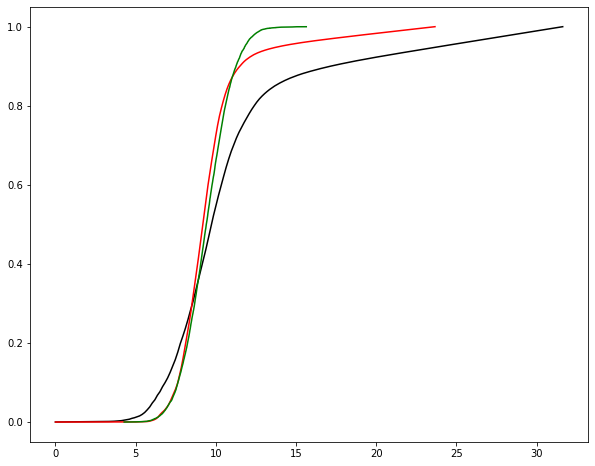

In [39]:
#######################################################
################# First Price Auction #################
#######################################################

#######################################################
############### Turnbull For Final Bid ################
#######################################################
censored_data = [[k[1], k[0]] if k[0] else [k[2], k[0]] for k in full]
    
xx, dist = turnbull(censored_data)
average_pctr = sum(k[-2] for k in full) / len(full)
xx = [k / average_pctr for k in xx]
plt.plot(xx, dist, 'black')

#######################################################
############### Turnbull For Running Bid ##############
#######################################################
censored_data = [[k[1] * k[-1] / k[2], k[0]] if k[0] else [k[-1], k[0]] for k in full]
xx, dist = turnbull(censored_data)
plt.plot(xx, dist, 'red')

#######################################################
##################### GroundTruth #####################
#######################################################
winningprice = []
for i in range(len(adex.bid_record)):
    if full[i][0]:
        winningprice.append(sorted(adex.bid_record[i][3])[-2][0])
    else:
        winningprice.append(sorted(adex.bid_record[i][3])[-1][0])
# winningprice = [k[0] for k in adex.bid_record]
gt = [winningprice[i] * full[i][-1] / full[i][2] for i in range(len(full))]
sorted_gt = sorted(gt)
plt.plot(sorted_gt, [k / len(sorted_gt) for k in range(len(sorted_gt))], 'green')

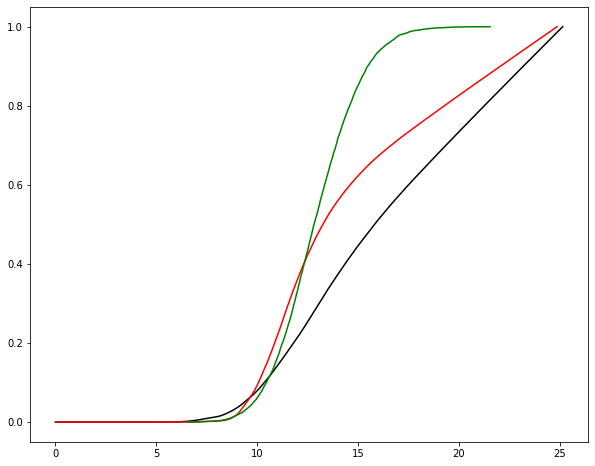

In [35]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
adex = adExchange(auction_type = "first", myself_idx = 0)
adex.clearRecord()
adex.generateMultipleBidRecord(10000)
c = 0
data = adex.getCensoredRecord(c)
full = adex.getFullInfoOfCompetitor(c)
#######################################################
################# First Price Auction #################
#######################################################

#######################################################
############### Turnbull For Final Bid ################
#######################################################
censored_data = [[k[1], k[0]] if k[0] else [k[2], k[0]] for k in full]
    
xx, dist = turnbull(censored_data)
average_pctr = sum(k[-2] for k in full) / len(full)
xx = [k / average_pctr for k in xx]
plt.plot(xx, dist, 'black')

#######################################################
############### Turnbull For Running Bid ##############
#######################################################
censored_data = [[k[1] * k[-1] / k[2], k[0]] if k[0] else [k[-1], k[0]] for k in full]
xx, dist = turnbull(censored_data)
plt.plot(xx, dist, 'red')

#######################################################
##################### GroundTruth #####################
#######################################################
winningprice = []
for i in range(len(adex.bid_record)):
    if full[i][0]:
        winningprice.append(sorted(adex.bid_record[i][3])[-2][0])
    else:
        winningprice.append(sorted(adex.bid_record[i][3])[-1][0])
# winningprice = [k[0] for k in adex.bid_record]
gt = [winningprice[i] * full[i][-1] / full[i][2] for i in range(len(full))]
sorted_gt = sorted(gt)
plt.plot(sorted_gt, [k / len(sorted_gt) for k in range(len(sorted_gt))], 'green')

In [27]:
full

[[0,
  -1,
  48.02137892760332,
  [2,
   1,
   10,
   2.9589273660894553,
   4.91803642783541,
   3.393574699775934,
   2.543308245361163,
   2.2103583180769033,
   5.681640509553665,
   5.155328554165861],
  24.20268145293334,
  1.9841346514017428],
 [0,
  -1,
  122.36432894391847,
  [2,
   2,
   3,
   6.647984292804877,
   3.4070156564663168,
   1.4123112371273505,
   3.961261687954762,
   2.894750398903014,
   6.522875088513872,
   1.6661480779726388],
  20.410327519333226,
  5.995216334868296],
 [0,
  -1,
  127.65245337297263,
  [2,
   4,
   6,
   3.5850942784353723,
   0.531825342763772,
   3.858548975188385,
   0.4496950154216902,
   6.574334408175128,
   3.655550404129872,
   6.225400967820498],
  24.615973041766402,
  5.185756953681344],
 [0,
  -1,
  116.26951788648793,
  [1,
   2,
   4,
   6.564612994765479,
   3.4197029140202524,
   4.239914617742399,
   0.8348767213541172,
   1.1343214547488967,
   1.1647792239727104,
   4.418842356105979],
  18.4074952806181,
  6.3164225286

(array([  12.,  123.,  539., 1452., 2511., 2566., 1827.,  765.,  188.,
          17.]),
 array([ 5.8724932 ,  8.6044359 , 11.33637859, 14.06832129, 16.80026399,
        19.53220668, 22.26414938, 24.99609208, 27.72803478, 30.45997747,
        33.19192017]),
 <a list of 10 Patch objects>)

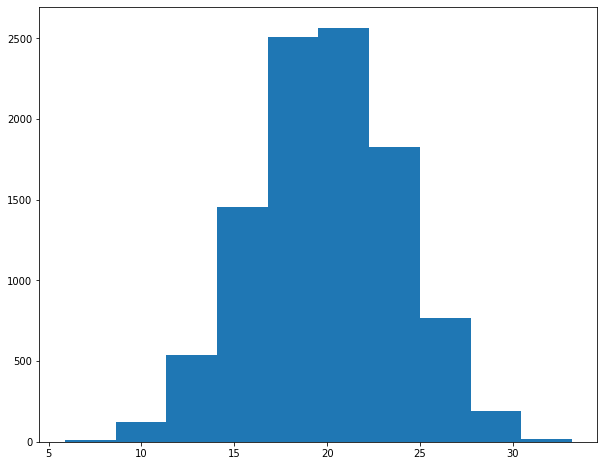

In [28]:
plt.hist([k[-2] for k in full])